# 7.3 Creating more charts
** **
## Table of contents:

1. Importing libraries <br>
2. Importing the dataframe <br>
3. Exercise charts
    - 3.1 Bar chart
    - 3.2 Histogram
        - 3.2.1 Addressing the abnormal values in the prices column
        - 3.2.2 Creating the histogram
    - 3.3 Scatterplot
    - 3.4 Line chart
        - 3.4.1 Sampling
        - 3.4.2 Creating the line chart
4. Task charts
    - 4.1 Creating an hours frequency histogram
    - 4.2 Creating a loyalty bar chart
    - 4.3 Creating a line chart tracking prices during different hours
    - 4.4 Creating a line chart tracking number of dependants over age
    - 4.5 Creating a scatterplot between age and income
5. Exporting the updated dataframe
** **

# 1. Importing libraries
** **

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing dataframe
** **

In [2]:
# Creating a path variabile for the folder
path = r'C:\Users\Simone\Desktop\Career Foundry\Esercizi modulo 5\Instacart basket analysis'

In [3]:
# Importing the ultimate dataframe from Prepared Data
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Changing the setting of the max columns shown to: None
pd.set_option('display.max_columns', None)

In [5]:
# Checking the output
df_ords_prods_all

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_dependants,fam_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.70,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
30328759,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy,Average orders,26,Regular customer,10.70,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
30328760,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest day,Most orders,4,New customer,8.10,Low spender,30.0,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
30328761,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regularly busy,Most orders,4,New customer,8.10,Low spender,30.0,Non-frequent customer,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


# 3. Exercise charts
** **

## 3.1 Bar chart

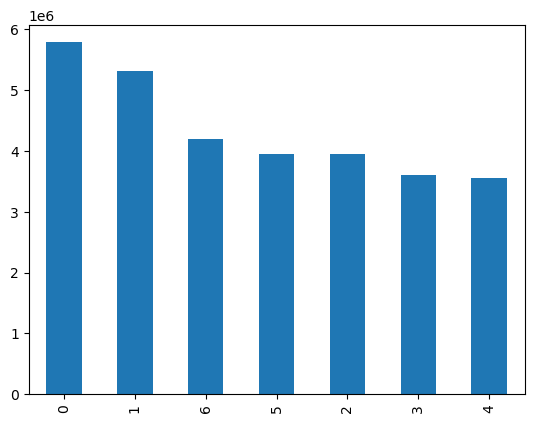

In [6]:
# Creating a bar chart
bar = df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

<b> Observations: </b> <br>
The chart shows how the busiest days are Saturday and Sunday (respectively 0 and 1).

In [7]:
# Exporting the file as png
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'bar_orders_dow.png'))

## 3.2 Histogram

### 3.2.1 Addressing the abnormal values in the prices column

From previous checks, we know for sure that there are abnormal values in the prices column. <br>
The issue needs to be addressed before creating the histogram.

In [8]:
# Checking the items that costs more than 100$
df_ords_prods_all.loc[df_ords_prods_all['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_creation,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_dependants,fam_status,income
7227,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Most orders,47,Loyal customer,54.13,High spender,6.0,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7228,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Least busy,Most orders,47,Loyal customer,54.13,High spender,6.0,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
11909,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest day,Average orders,48,Loyal customer,35.90,High spender,5.0,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
16553,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regularly busy,Average orders,29,Regular customer,277.26,High spender,8.0,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
18710,172425,3819,3,1,12,30.0,21553,14,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest day,Most orders,10,New customer,442.65,High spender,24.0,Non-frequent customer,Gregory,Cabrera,Male,Utah,69,1/26/2020,2,married,129749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30221298,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regularly busy,Most orders,7,New customer,1270.07,High spender,23.0,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
30237631,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Least busy,Average orders,4,New customer,12507.43,High spender,6.0,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880
30237632,2741225,95105,4,5,12,2.0,33664,3,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regularly busy,Most orders,4,New customer,12507.43,High spender,6.0,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880
30240900,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Least busy,Most orders,13,Regular customer,4004.87,High spender,13.0,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490


4776 rows contains outliers. Two items costs 14.900 and 99.999 $.

In [9]:
# Assigning missing values to these outliers
df_ords_prods_all.loc[df_ords_prods_all['prices'] >100, 'prices'] = np.nan

In [10]:
# Checking if there are any other outliers
df_ords_prods_all['prices'].max()

25.0

Max value in the prices column is now 25. We have successfully changed the value of the outliers to "NaN". <br>
Is now possible to create the histogram.

### 3.2.2 Creating the histogram

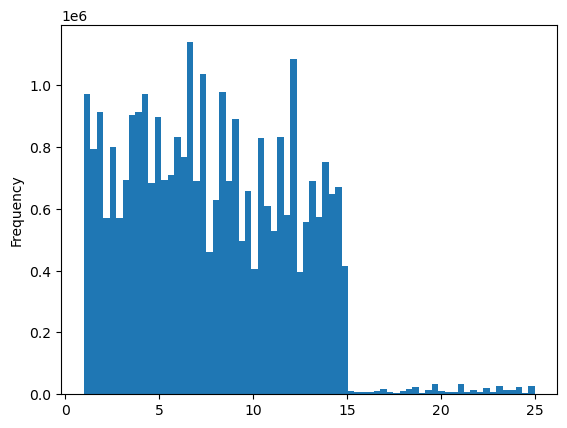

In [11]:
# Creating the histogram on prices column
hist = df_ords_prods_all['prices'].plot.hist(bins = 70)

<b> Observations: </b> <br>
Price of most of the products is between 1 and 15 dollars.

In [12]:
# Exporting the file as png
hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'histogram_prices.png'))

## 3.3 Scatterplot

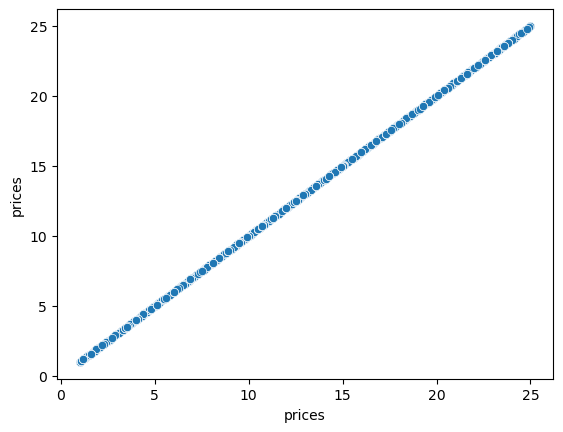

In [13]:
# Creating a scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_all)

In [14]:
# Exporting the file as png
scatter.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'scatterplot_prices.png'))

## 3.4 Line chart

In this section we are going to create a line chart for the prices during different days of the weeks. <br>
Since the prices column is continuous and contains a lot of value, is better to create a subset that contains only a part of the total dataframe. <br>
Creating representative sample as a subset, it will involve some randomization.

### 3.4.1 Sampling

In [15]:
# Creating a sample as a subset
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [16]:
# Testing the dev list
dev

array([False,  True, False, ...,  True, False,  True])

In [17]:
# Creating a dataframe with 70% of rows of the original dataframe
big = df_ords_prods_all[dev]

In [18]:
# Creating a dataframe with 30% of rows of the original dataframe
small = df_ords_prods_all[~dev]

In [19]:
# Checking if the original dataframe and the two samples have the same length.
len(df_ords_prods_all)

30328763

In [20]:
len(big) + len(small)

30328763

In [21]:
# Creating a new dataframe containing only the columns needed
df_2 = small[['orders_day_of_week','prices']]

### 3.4.2 Creating the line chart

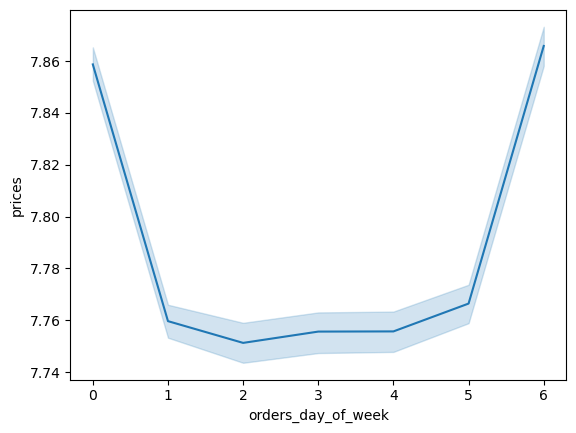

In [22]:
# Creating a linechart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [23]:
# Exporting the line chart
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_prices.png'))

# 4. Tasks
** **

# 4.1 Creating an hours frequency histogram

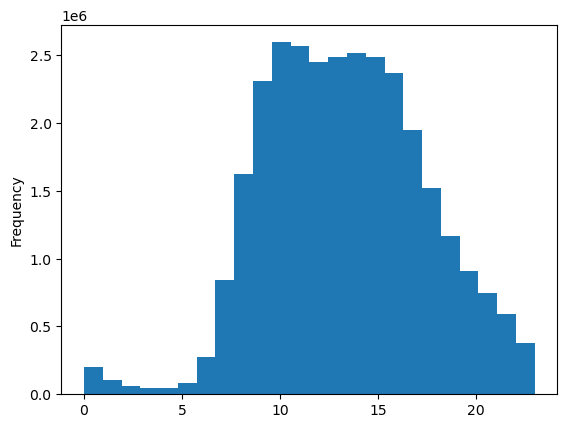

In [24]:
# Creating an histogram of order_hour_of_creation column
hist_2 = df_ords_prods_all['order_hour_of_creation'].plot.hist(bins = 24)

<b> Observations: </b> <br>
This chart has 24 bins, one for every hour. <br>
The histogram demonstrates (as previously shown by the value_counts aggregation) that the hours with the most orders are from 9 to 16.

In [25]:
# Exporting the histogram
hist_2.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'histogram_hours.png'))

# 4.2 Creating a loyalty bar chart

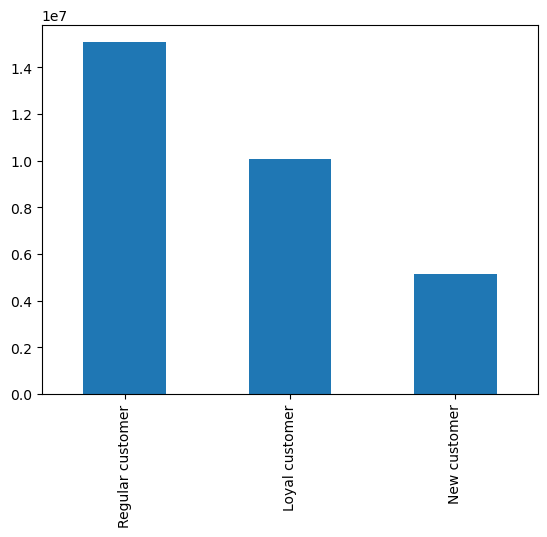

In [26]:
# Creating a bar chart for the loyalty_flag
bar_2 = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [27]:
# Checking the frequency
df_ords_prods_all['loyalty_flag'].value_counts()

Regular customer    15081691
Loyal customer      10095381
New customer         5151691
Name: loyalty_flag, dtype: int64

<b> Observations: </b> <br>
As shown by the chart above and the values count, most of the products are bought by "Regular customers". <br>
"Loyal customers" come in second place and "New customers" in last place.

In [28]:
# Exporting the bar chart
bar_2.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_loyalty.png'))

# 4.3 Creating a line chart tracking prices during different hours

In [29]:
# Creating a new dataframe as a subset of the "small" dataframe, containing only the two columns needed
df_3 = small[['order_hour_of_creation','prices']]

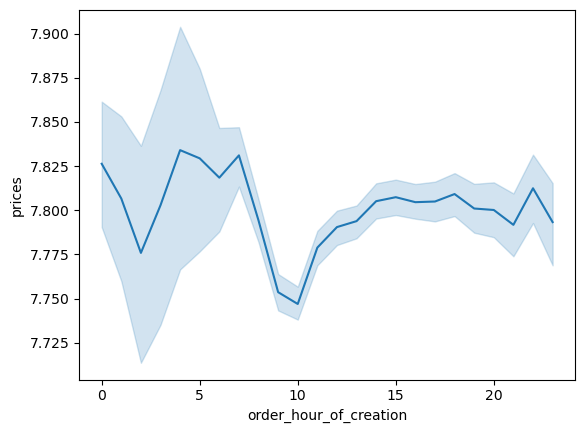

In [30]:
# Creating the line chart
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_creation', y = 'prices')

<b> Observations: </b> <br>
It seems that during the morning there is a negative peak when it comes to prices. <br>
Maybe because during the morning our customers buy cheapest goods, like goods related to breakfast. <br>
During the rest of the day, data fluctuates slightly. <br>
Surprisingly the peak is during the night. <br>
However, the hours 0-6 are also the hours with the least orders placed (in terms of quantity), so it could be some kind of exception.

In [31]:
# Exporting the line chart
line_2.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_prices_hour.png'))

## 4.4 Creating a line chart tracking number of dependants over age

In [32]:
# Creating a new dataframe containing only the columns of interest
df_4 = df_ords_prods_all[['number_dependants','age']]

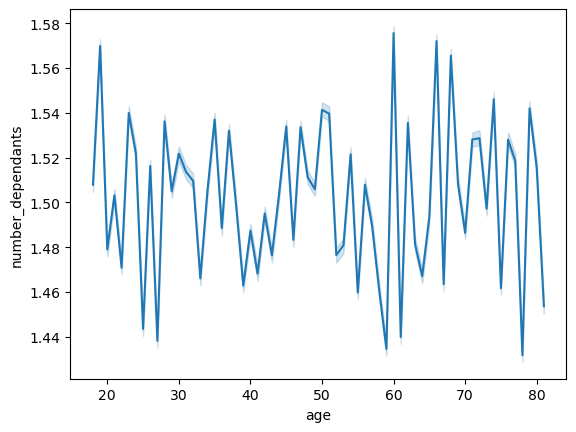

In [33]:
# Creating the line chart
line_3 = sns.lineplot(data = df_4, x = 'age', y = 'number_dependants')

<b> Observations: </b> <br>
Chart is extremely fluctuating and I don't think is very useful. I will try to invert the axis and see.

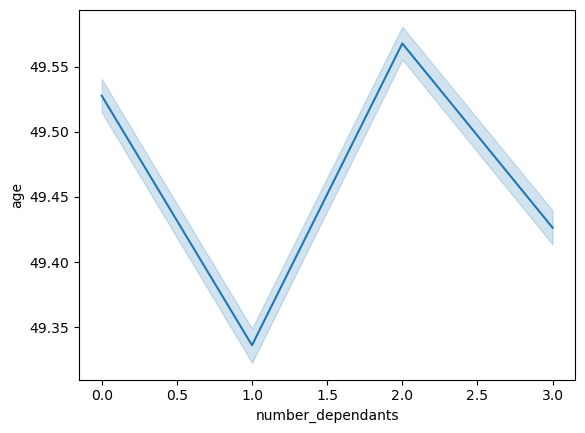

In [34]:
# Creating a new line chart inverting the axes
line_4 = sns.lineplot(data = df_4, x = 'number_dependants', y = 'age')

<b> Observations: </b> <br>
This is even worse because age is calculated by the mean. <br>
This chart won't tell us anything. There isn'a pattern.

In [35]:
# Exporting the two charts as png
line_3.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_dependants_age.png'))

In [36]:
line_4.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_age_dependants.png'))

## 4.5 Creating a scatterplot between age and income

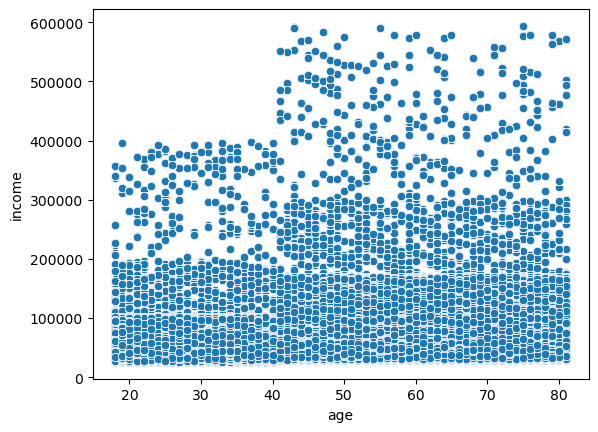

In [37]:
# Creating the scatterplot
scatter_2 = sns.scatterplot(x = 'age', y = 'income', data = df_ords_prods_all)

<b> Observations: </b> <br>
It seems there is some kind of correlation between age and income. <br>
The most frequent values are between 0 and 200.000 (for all ages). <br>
However, there is a significative difference in max values. <br>
For age 18-40 the max value is around 400.000, while for age over 40 max value extends way above 400.000, suggesting that there is a correlation between age and income.

In [38]:
# Exporting the scatterplot as png
scatter_2.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'scatterplot_income_age.png'))

# 5. Exporting the updated dataframe
** **

Since we modified the "prices" column (replacing the outliers with missing values) we need to export the new version of the datafrem.

In [39]:
# Exporting the dataframe as a pickle file
df_ords_prods_all.to_pickle(os.path.join(path, '02. Data','Prepared Data', 'orders_products_all_clean.pkl'))